# INTRODUCCIÓN A OPENCV

# 1. Introducción


## OpenCV
OpenCV es una biblioteca de visión artificial de código libre, escrita en C++, originalmente desarrollada por Gary Bradsky en Intel. Fue construida para proporcionar una infrastructura común para aplicaciones de visión por computador. 

La librería contiene más de 2500 algoritmos optimizados, entre los que se incluyen algoritmos clásicos y algoritmos del estado del arte de los campos de visión por computador y aprendizaje automático.

Características principales:

* Licencia BSD.
* Interfaces: C++, C, Python, Java y MATLAB.
* Sistemas Operativos: Windows, GNU/Linux, Android, iOS y Mac OS.
* Soporte CUDA, OpenCL y FPGA.

URL: http://www.opencv.org


## OpenCV-Python

OpenCV-Python es el API de OpenCV para Python, donde se combinan las mejores cualidades del API C++ de OpenCV con el lenguaje de programación Python, diseñada para resolver problemas de visión por computador. 

OpenCV-Python hace uso de Numpy, que es una librería altamente optimizada para operaciones de cálculo numérico con una sintaxis similar a la de MATLAB. Todas las estructuras array son convertidas a Numpy arrays. Esto permite la integración con otras librerías que también hacen uso de Numpy, tales como SciPy o Matplotlib.


## Plataformas

OpenCV se ha diseñado para ser multiplataforma. En la actualidad es soportado en CUDA/OpenCL e incluso en plataformas móviles iOS/Android.

URL: http://opencv.org/platforms.html

# 2. Instalación

pip install opencv-python


# 3. Manejo de ficheros, cámaras e interfaces gráficas de usuario

La gran mayoría de aplicaciones que se desarrollan con OpenCV necesitan como entrada una o varias imágenes, pero también puede ser que esas imágenes se presenten en forma de vídeo. Además, también es bastante probable que las aplicaciones necesiten generar como salida del programa una nueva imágen. 


## Lectura y escritura de imágenes
Hay que utilizar la función **cv2.imread()** para leer una imágen. La imágen debe estar en el directorio de trabajo o debe proporcionarse la ruta absoluta de la imagen (o relativa).

El segundo argumento de la función es un *flag* que especifica la forma en la que la imagen debe ser leída.

* cv2.IMREAD_COLOR: Carga la imagen a color. Si la imagen posee transparencias serán desechadas. Es el *flag* por defecto.
* cv2.IMREAD_GRAYSCALE: Carga la imagen en modo escala de grises.
* cv2.IMREAD_UNCHANGED: Carga la imagen incluyendo el canal *alpha*.

Para poder escribir/guardar una nueva imagen, hay que utilizar la función **cv2.imwrite()**.


**Ejemplo 1**. Cargar una imagen y guardarla con otro nombre.

In [1]:
import cv2

# Load
image_path = '1a.jpeg'
image = cv2.imread(image_path)

# Save copy as png
image_copy_path = '1a-copy.png'
cv2.imwrite(image_copy_path, image)

# Load copy
image_copy = cv2.imread(image_copy_path)

# Show
cv2.imshow('Original', image)
cv2.imshow('Copy', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

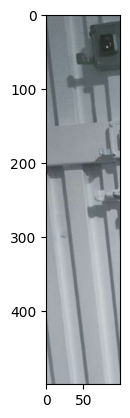

In [4]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(image[0:500, 100:200])


**Ejercicio 1**. Descargar una imagen de internet, cargarla y guardar una copia en blanco y negro.

In [ ]:
# Ejercicio 1

## Conversión entre imágenes y *raw bytes*
Conceptualmente, un byte es un entero que se encuentra en el rango [0, 255]. En las aplicaciones actuales, un píxel es representado normalmente por un byte por canal, aunque también pueden haber otras representaciones.

Una imagen OpenCV es un array 2D o 3D de tipo **numpy.array**. Una imagen en escala de grises de 8 bits es un array 2D que contiene valores para cada byte. Una imagen a color RGB es un array 3D, que también contiene valores para cada byte. Es posible acceder a esos valores utilizando una expresión como la siguiente:
* image[0, 0] o image[0, 0, 0]

El primer índice representa la coordenada *y* (fila), siendo el 0 el valor que está más arriba. El segundo índice representa la coordenada *x* (columna), siendo el valor 0 el que está más a la izquierda. El tercer índice (en imágenes RGB) representa el canal de color.

Por ejemplo, una imagen en escala de grises con un píxel blanco en la esquina superior izquierda, image[0, 0] sería 255. Para una imagen RGB con un píxel de color azul en la esquina superior izquierda, image[0, 0] sería [255, 0, 0]. También se puede utilizar el método **setitem** para asignar valores a cada píxel, ya que esta función es más eficiente. Pero, como veremos a continuación, normalmente realizaremos operaciones sobre conjuntos de píxeles más grandes y no trabajaremos píxel a píxel de forma manual.

Sabiendo que una imagen tiene 8 bits por canal, podemos realizar la conversión a un bytearray de python, que es unidimensional. De igual forma, dado un bytearray que contenga bytes en el orden adecuado, podemos realizar la conversión a un objeto de tipo numpy.array, que en efecto es una imagen.
* gray_image = numpy.array(gray_byte_aray).reshape(height, width)
* bgr_image = numpy.array(bgr_byte_array).reshape(height, width, 3)

**Ejemplo2**. Conversión de un bytearray que contiene bytes aleatorios en una imagen en escala de grises y en una imagen RGB.

In [3]:
import cv2
import numpy
import os

# Make an array of 120,000 random bytes.
random_byte_array = bytearray(os.urandom(120000))
flat_numpy_array = numpy.array(random_byte_array)

# Convert the array to make a 400x300 grayscale image.
gray_image = flat_numpy_array.reshape(300, 400)
cv2.imshow('Random gray', gray_image)

# Convert the array to make a 400x100 color image.
bgr_image = flat_numpy_array.reshape(100, 400, 3)
cv2.imshow('Random color', bgr_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Acceso a las propiedades de la imagen

Las propiedades de una imagen incluyen numero de filas, de columnas y canales, tipos de datos, número de píxeles, etc.
* *Forma*: img.shape
* *Número de píxeles*: img.size
* *Tipo de datos*: img.dtype

## Introducción al manejo de vídeos

Para capturar un vídeo, es necesario crear un objeto de tipo **VideoCapture**. Su argumento puede ser tanto el índice del dispositivo como el nombre del fichero.

El índice del dispositivo es el número que identifica qué camara capturar. Como normalmente sólo suele haber una cámara conectada, se suele utilizar el identificador "0" para capturar de ella.

El método **cap.read()** devuelve un valor booleano (True/False). Si el *frame* se leyó correctamente, devolverá True. De esta forma, se puede comprobar cuándo se ha llegado al final de la lectura del vídeo comprobando este parámetro. 

A veces, el objeto **VideoCapture** puede no haber logrado la inicialización de la captura correctamente. Por ello, es mejor comprobar si se ha inicializado o no a través del método **cap.isOpened()**. Si el resultado es True es que sí se ha podido abrir la captura.

**Ejemplo 3**. Cargar y reproducir un vídeo en escala de grises.

In [ ]:
import numpy as np
import cv2

video_file = 'video.mp4'
cap = cv2.VideoCapture(video_file)

while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret == True:
        # Operations on the frame
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Display the resulting frame
        cv2.imshow('frame', gray)
    
        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'): #espera un milisengudo si oprimo algo, si no, devuelve -1
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

Además, también es posible acceder a algunas de las propiedades del vídeo utilizando el método **cap.get(prop_id)** donde **prop_id** es un número [0, 18] que denota una propiedad del vídeo. Por último, hay que destacar que algunos de esos valores pueden ser modificados mediante el método **cap.set(prop_id, value)**. En el siguiente enlace están descritas todas las propiedades:
* http://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get
* http://docs.opencv.org/3.1.0/d8/dfe/classcv_1_1VideoCapture.html#aeb1644641842e6b104f244f049648f94

**Ejemplo 4**. Mostrar el número de FPS del vídeo.

In [13]:
import cv2

video_file = 'video.mp4'
cap = cv2.VideoCapture(video_file)

# Propiedades del texto (FPS)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 255, 255)
thickness = 1

# Obtener propiedades del video
height_prop = cv2.CAP_PROP_FRAME_HEIGHT
fps_prop = cv2.CAP_PROP_FPS

# Crear una ventana redimensionable
cv2.namedWindow("Video", cv2.WINDOW_NORMAL)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Obtener tamaño actual de la ventana
    window_width, window_height = cv2.getWindowImageRect("Video")[2:4]

    # Redimensionar frame al tamaño de la ventana
    frame_resized = cv2.resize(frame, (window_width, window_height))

    # Obtener FPS del video
    fps = "{0:.2f}".format(cap.get(fps_prop))
    text = "FPS: " + fps

    # Ajustar posición del texto dinámicamente
    position = (50, window_height - 50)

    # Dibujar el texto sobre el frame redimensionado
    cv2.putText(frame_resized, text, position, font, font_scale, color, thickness)

    # Mostrar el video
    cv2.imshow("Video", frame_resized)

    # Salir si el usuario presiona 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:536: error: (-27:Null pointer) NULL window: 'Video' in function 'cvGetWindowRect_W32'


In [11]:
import numpy as np
import cv2

video_file = 'video.mp4'
cap = cv2.VideoCapture(video_file)

# Propiedades del texto
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 255, 255)
thickness = 1

# Obtener las propiedades de altura y FPS según la versión de OpenCV
if cv2.__version__.startswith('2.4'):
    height_prop = cv2.cv.CV_CAP_PROP_FRAME_HEIGHT 
    fps_prop = cv2.cv.CV_CAP_PROP_FPS
else:
    height_prop = cv2.CAP_PROP_FRAME_HEIGHT
    fps_prop = cv2.CAP_PROP_FPS

# Tamaño máximo de la pantalla para evitar que el video sea demasiado grande
screen_width = 800  # Ajusta según el tamaño de tu pantalla
screen_height = 600  # Ajusta según el tamaño de tu pantalla

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Obtener dimensiones originales
    height, width = frame.shape[:2]

    # Calcular escala para que encaje en la pantalla sin deformarse
    scale = min(screen_width / width, screen_height / height)
    new_width = int(width * scale)
    new_height = int(height * scale)

    # Redimensionar frame manteniendo la relación de aspecto
    frame = cv2.resize(frame, (new_width, new_height))

    # Posición del texto adaptada al nuevo tamaño
    position = (50, new_height - 50)

    # Obtener los FPS del video
    fps = "{0:.2f}".format(cap.get(fps_prop))
    text = "FPS: " + fps

    # Dibujar el texto sobre el frame redimensionado
    cv2.putText(frame, text, position, font, font_scale, color, thickness)

    # Mostrar el video
    cv2.imshow("Video", frame)

    # Salir si el usuario presiona 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
cv2.destroyAllWindows()



**Ejercicio 2**. Descargar un vídeo de https://videos.pexels.com/video-license y mostrar las propiedades más relevantes sobre el propio vídeo mientras se reproduce.

In [ ]:
# Ejercicio 2

## Captura de vídeo desde la *webcam* 

El índice del dispositivo es el número que identifica qué camara capturar. Como normalmente sólo suele haber una cámara conectada, se suele utilizar el identificador "0" para capturar de ella.

**Ejemplo 5**. Captura de vídeo desde la *webcam* y realización de operaciones de inversión de la imagen.

In [20]:
import numpy as np
import cv2

webcam_id = 0
cap = cv2.VideoCapture(webcam_id)

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Operations on the frame
        v_frame = cv2.flip(frame, 1)
        h_frame = cv2.flip(frame, 0)
        
        # Display
        cv2.imshow("Original", frame)
        cv2.imshow("Vertical flip", v_frame)
        cv2.imshow("Horizontal flip", h_frame)

        # Exit?
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

# 4. Histogramas

Un histograma es un gráfico que nos da una idea general sobre la distribución de la intensidad de una imagen. Generalmente, es un gráfico en el que en el eje X se establece el rango [0, 255] y en el eje Y se muestra la cantidad de píxeles con dicha intensidad.

Es otra forma de entender una imagen. Mirando el histograma de una imagen, podemos intuir el contraste, el brillo y la distribución de la intensidad de una imagen.

Dentro de los parámetros básicos de un histograma, destacan los siguientes:

* **BINS**. Establece el rango de valores que son mostrados en el eje X. Normalmente mostraremos 256 valores (de 0 a 255), pero podría darse el caso que quisiéramos agrupar las intensidades. Por ejemplo, podríamos mostrar los valores de 0 a 15, de 16 a 31, ..., de 240 a 255. De esta forma sólo tendríamos 16 valores que representar en el histograma.

* **DIMS**. Número de dimensiones. Es el número de parámetros para los cuales se hace el cálculo. En este caso la dimensión será 1 ya que únicamente estamos calculando la intensidad.

* **RANGO**. Es el rango de intensidades que se desea medir. Normalmente será [0, 255], es decir, todo el rango de valores.

OpenCV proporciona la función **cv2.calcHist** para calcular el histograma de una imagen. Esta función tiene los siguientes parámetros:

* *images*. Imagen fuente. El parámetro es una lista de imágenes.
* *channels*. Índice del canal sobre el cual se desea calcular el histograma.
* *mask*. Máscara de imagen. Si se desea calcular el histograma de la imagen completa, deberá establecerse a *None*.
* *histSize*. Representa el contador BIN. También es una lista. En nuestro caso, utilizaremos [256].
* *ranges*. Este es el RANGO. Normalmente, utilizaremos [0, 255].

** Ejemplo 13**. Calcular el histograma sobre una imagen en escala de grises y mostrar el gráfico.

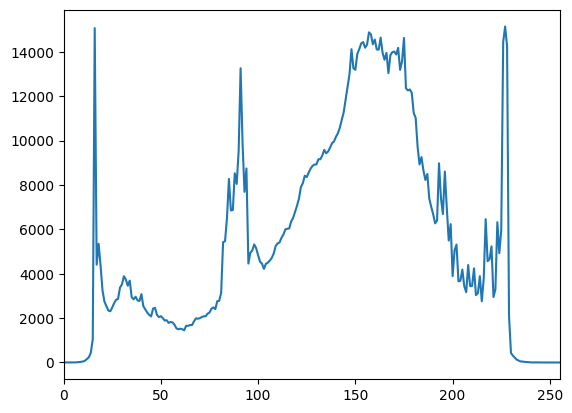

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load
image_path = '1a.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Show image
cv2.imshow('Image', image)
cv2.waitKey(0)

# Histogram
hist = cv2.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0,255])

# Plot
plt.plot(hist)
plt.xlim([0, 255])
plt.show()

cv2.destroyAllWindows()

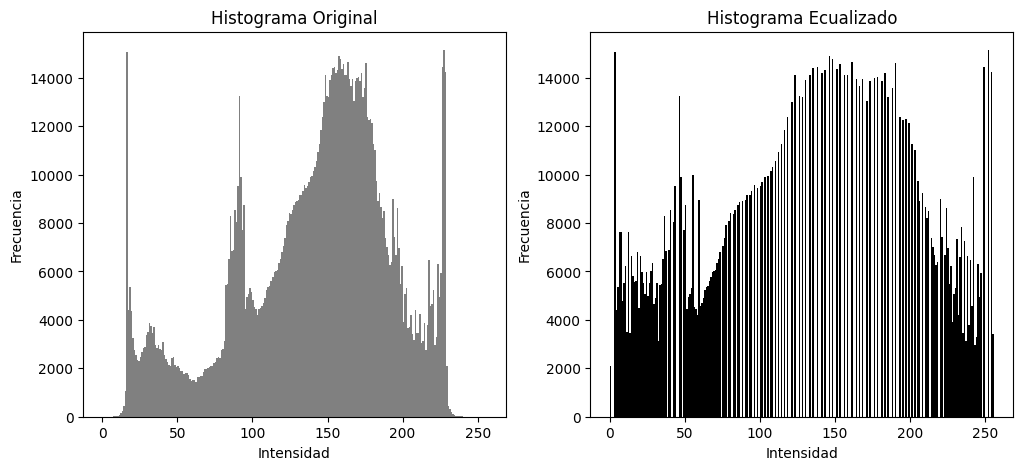

In [19]:
#Equalizer

# Cargar la imagen en escala de grises
image = cv2.imread("1a.jpeg", cv2.IMREAD_GRAYSCALE)

# Aplicar ecualización de histograma
equalized_image = cv2.equalizeHist(image)

# Mostrar la imagen original y la ecualizada
cv2.imshow("Imagen Original", image)
cv2.imshow("Imagen Ecualizada", equalized_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Mostrar histogramas para comparación
plt.figure(figsize=(12, 5))

# Histograma de la imagen original
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Histograma de la imagen ecualizada
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.show()


**Ejercicio**. Mostrar en un único gráfico los 3 histogramas de la imagen anterior para cada uno de los canáles de color RGB.

In [18]:
# Ejercicio